In [94]:
#import required libraries
import pandas as pd

In [89]:
# Loading Sales dataset
df = pd.read_csv("AusApparalSales4thQrt2020.csv")

<b>Let’s take a quick look at the first few rows of the dataset to understand its structure, column names, and sample values using head function.</b>

In [4]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


<h3> Data Wrangling </h3>

<b>Identify Count of missing values per column using isna function</b>


In [92]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

<b>This helps us understand data completeness and identify columns that may require cleaning or imputation exist </b>


In [93]:
df.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

<b>This dataset has no missing or incorrect values, so we don’t need to fix anything.
But in real cases, we usually fill missing numbers (like Sales or Quantity) with the mean or median, and for text fields (like State or Group), we use the most common value or mark them as ‘Unknown’.</b>

<b>Fill missing values in Sales (numerical) with mean </b><br/>
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())

<b>Fill missing values in Group (categorical) with mode </b><br/>
df['Group'] = df['Group'].fillna(df['Group'].mode()[0])


In [95]:
# Import required libraries
from sklearn.preprocessing import MinMaxScaler

In [9]:
# Select numerical columns for normalization
num_cols = ['Unit', 'Sales']
# Initialize the scaler
scaler = MinMaxScaler()
# Fit and transform
df[num_cols] = scaler.fit_transform(df[num_cols])

<b>Normalization ensures numerical values (Unit, Sales) fall between 0 and 1. 
This makes analysis fair, since Sales values are much larger than Unit values. 
Without normalization, models may be biased towards Sales because of its larger scale.</b>

In [10]:
# Display normalized data
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873


<b>GroupBy() helps in splitting data into meaningful chunks (like per Group or State) and applying summary statistics such as sum, mean, or count. 
For this dataset, it's best to use GroupBy for chunking + aggregation to understand Sales distribution across Groups, States, or Time.</b>


In [11]:
sales_consolidated = df.groupby('Group')['Sales'].sum().reset_index()
sales_consolidated

,Group,Sales
0,Kids,480.142857
1,Men,484.444444
2,Seniors,473.571429
3,Women,482.492063


<h3> Data Analysis </h3>

In [20]:
# Load Sales dataset
df_orig = pd.read_csv("AusApparalSales4thQrt2020.csv")

<b>Descriptive Statistics </b><br/>
Before analyzing trends and group-wise differences, we begin with descriptive statistics to understand the 
distribution of numerical features such as **Sales** and **Units**.

In [112]:
# Summary statistics
df_orig.describe()

,Date,Unit,Sales
count,7560,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201
min,2020-10-01 00:00:00,2.000000,5000.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000
50%,2020-11-15 12:00:00,14.000000,35000.000000
75%,2020-12-08 00:00:00,26.000000,65000.000000
max,2020-12-30 00:00:00,65.000000,162500.000000
std,NaN,12.901403,32253.506944


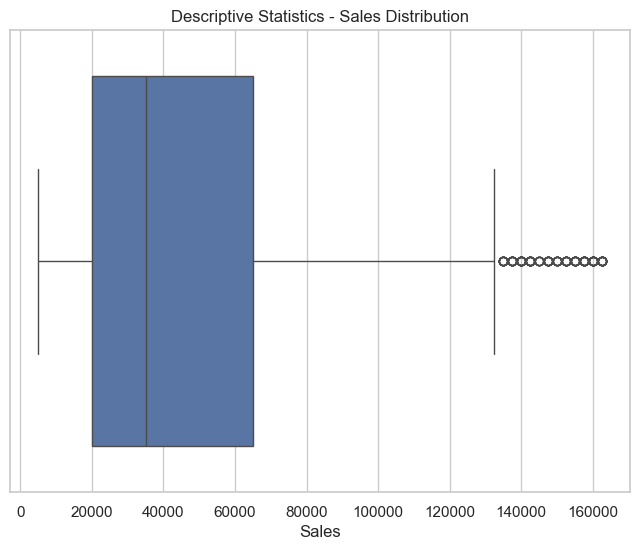

In [113]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for Sales
plt.figure(figsize=(8,6))
sns.boxplot(x=df_orig["Sales"])
plt.title("Descriptive Statistics - Sales Distribution")
plt.xlabel("Sales")
plt.show()


<b> Displaying the Mean, Median, Mode & Standard deviation of the Sales </b>

In [29]:
# Mean of the Sales
Sales_mean = df_orig['Sales'].mean()

# Median of the Sales
Sales_median = df_orig['Sales'].median()

# Mode of the Sales
Sales_mode = df_orig['Sales'].mode()

#Std of Sales
Sales_Std = df_orig['Sales'].std()

print("Mean - ", Sales_mean)
print("Median - ", Sales_median)
print("Mode - ", Sales_mode[0])
print("Standard deviation - ", Sales_Std)

Mean -  45013.5582010582
Median -  35000.0
Mode -  22500
Standard deviation -  32253.506943966317


<b> Displaying the Mean, Median, Mode & Standard deviation of the Unit </b>

In [30]:
# Mean of the Units
Unit_mean = df_orig['Unit'].mean()

# Median of the Units
Unit_median = df_orig['Unit'].median()

# Mode of the Units
Unit_mode = df_orig['Unit'].mode()

#Std of Units
Unit_Std = df_orig['Unit'].std()

print("Mean - ", Unit_mean)
print("Median - ", Unit_median)
print("Mode - ", Unit_mode[0])
print("Standard deviation - ", Unit_Std)

Mean -  18.00542328042328
Median -  14.0
Mode -  9
Standard deviation -  12.901402777586458


<b> Identifying the Group with the highest sales and the group with the lowest sales based on the data provided. </b>

In [44]:
group_sales = df_orig.groupby('Group')['Sales'].sum()

In [48]:
# Find highest and lowest sales
highest_group = group_sales.idxmax()
highest_value = group_sales.max()

lowest_group = group_sales.idxmin()
lowest_value = group_sales.min()

print("Highest Sales -", highest_group , " - " , highest_value)
print("Lowest Sales -", lowest_group , " - " , lowest_value)

Highest Sales -  Men  -  85750000
Lowest Sales -  Seniors  -  84037500


<b> Generating weekly, monthly, and quarterly reports to document and presenting the results of the analysis conducted </b>

In [98]:
import pandas as pd

In [99]:
# convert date to Datetime
df_orig['Date'] = pd.to_datetime(df_orig['Date'], format="%d-%b-%Y")

In [102]:
# Set date as Index
df_time = df_orig.set_index('Date')

In [103]:
# Weekly Report
weekly_report = df_time.resample('W').agg({'Sales': 'sum', 'Unit': 'sum'})

# Monthly Report (Month-End)
monthly_report = df_time.resample('ME').agg({'Sales': 'sum', 'Unit': 'sum'})

# Quarterly Report (Quarter-End, Dec as default year-end)
quarterly_report = df_time.resample('QE').agg({'Sales': 'sum', 'Unit': 'sum'})


In [104]:
# Displaying the weekly, monthly & quarterly reports

print("Weekly Report:\n", weekly_report.head())
print("\nMonthly Report:\n", monthly_report.head())
print("\nQuarterly Report:\n", quarterly_report.head())

Weekly Report:
                Sales   Unit
Date                       
2020-10-04  15045000   6018
2020-10-11  27002500  10801
2020-10-18  26640000  10656
2020-10-25  26815000  10726
2020-11-01  21807500   8723

Monthly Report:
                 Sales   Unit
Date                        
2020-10-31  114290000  45716
2020-11-30   90682500  36273
2020-12-31  135330000  54132

Quarterly Report:
                 Sales    Unit
Date                         
2020-12-31  340302500  136121


<h3> Data Visualization </h3>

In [105]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

<b> Displaying State-wise sales analysis for different demographic groups (kids, women, men, and seniors) using Seaborn library </b>

In [57]:
# Set a clean theme
sns.set_theme(style="whitegrid")

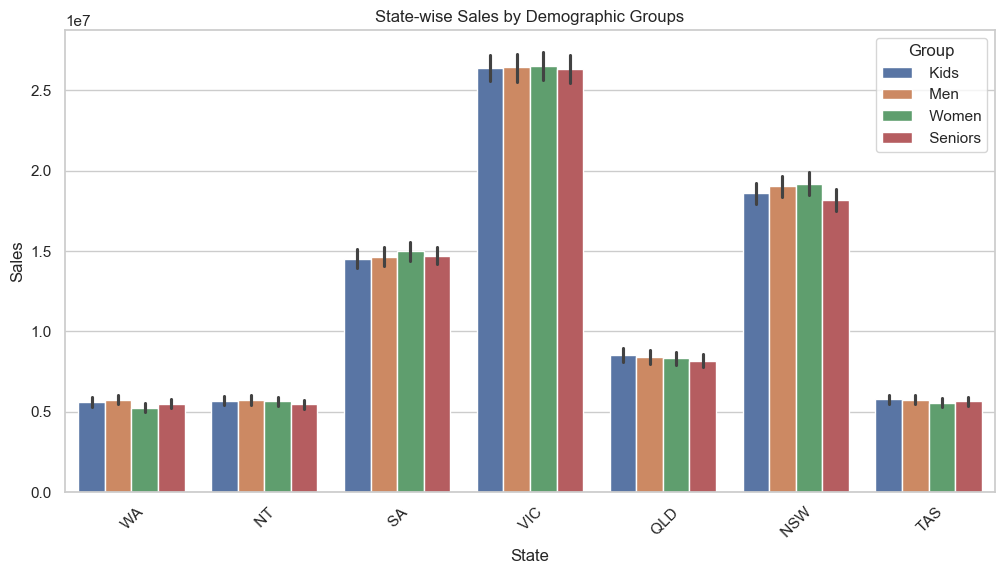

In [106]:
# =============================
#  State-wise sales by demographic group
# =============================

plt.figure(figsize=(12,6))
sns.barplot(data=df_orig, x='State', y='Sales', hue='Group', estimator=sum)
plt.title("State-wise Sales by Demographic Groups")
plt.xticks(rotation=45)
plt.show()

<b> Displaying group wise sales analysis across states using Seaborn library </b>

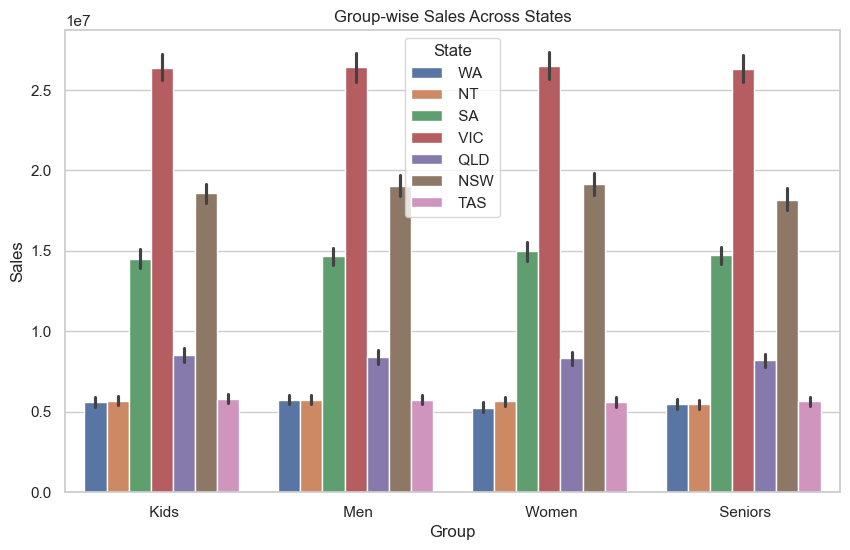

In [107]:
# =============================
# Group-wise sales across states
# =============================
plt.figure(figsize=(10,6))
sns.barplot(data=df_orig, x='Group', y='Sales', hue='State', estimator=sum)
plt.title("Group-wise Sales Across States")
plt.show()

<b> Displaying Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams using Seaborn library. </b>

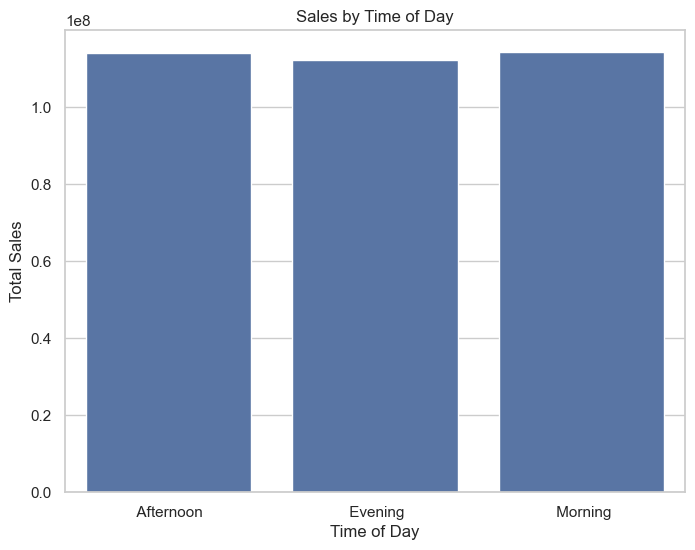

In [109]:
# Group sales by Time of the day
time_sales = df_orig.groupby("Time")["Sales"].sum().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=time_sales, x="Time", y="Sales", legend=False)
plt.title("Sales by Time of Day")
plt.ylabel("Total Sales")
plt.xlabel("Time of Day")
plt.show()


<b> Below Charts contains Daily, Weekly, Monthly & Quarterly Trends of the Data </b>

<b> <i> Daily Sales </i> </b>

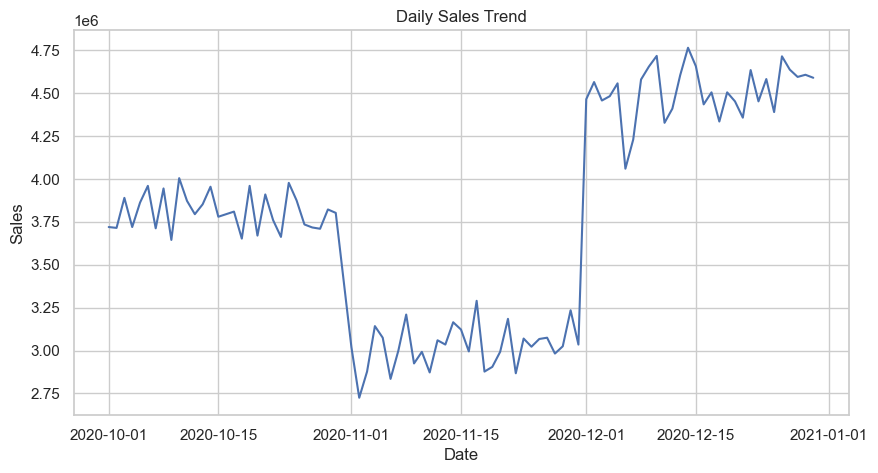

In [114]:
# Daily Sales
daily_sales = df_orig.groupby("Date")["Sales"].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=daily_sales, x="Date", y="Sales")
plt.title("Daily Sales Trend")
plt.show()

<b> <i> Weekly Sales </i> </b>

In [131]:
# Convert to datetime
df_orig["Date"] = pd.to_datetime(df_orig["Date"], errors="coerce")

# Create new time-based columns
df_orig["Year"] = df_orig["Date"].dt.year
df_orig["Month"] = df_orig["Date"].dt.month
df_orig["Quarter"] = df_orig["Date"].dt.quarter
df_orig["Week"] = df_orig["Date"].dt.isocalendar().week

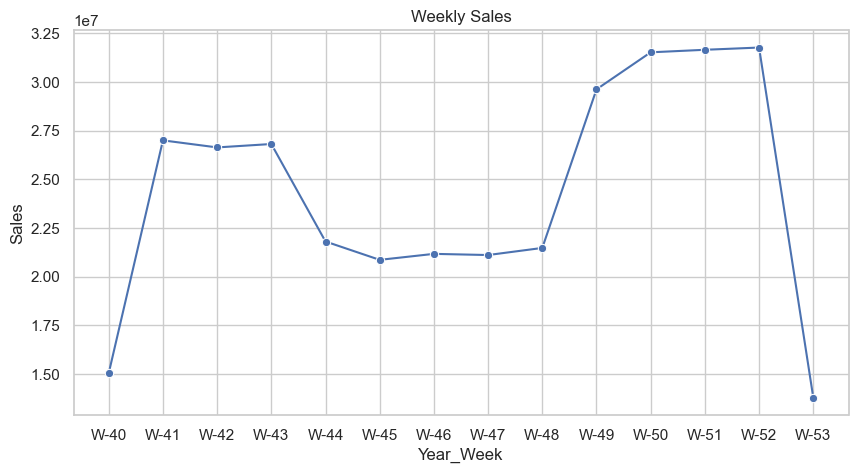

In [132]:
# Weekly Sales
weekly_sales = df_orig.groupby(["Year","Week"])["Sales"].sum().reset_index()
# Create a label like 2024-W40
weekly_sales["Year_Week"] = "W-" + weekly_sales["Week"].astype(str)

plt.figure(figsize=(10,5))
sns.lineplot(data=weekly_sales, x="Year_Week", y="Sales", marker="o")
plt.title("Weekly Sales")
plt.show()

<b> <i> Monthly Sales </i> </b>

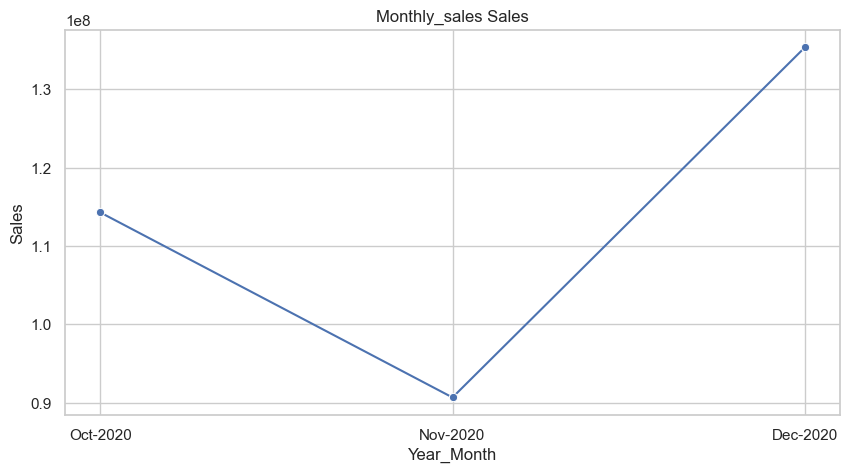

In [130]:
import calendar
# Group monthly sales
monthly_sales = df_orig.groupby(["Year","Month"])["Sales"].sum().reset_index()

# Convert Month number to abbreviated name
monthly_sales["Month_Name"] = monthly_sales["Month"].apply(lambda x: calendar.month_abbr[int(x)])

# Combine Year + Month name for clear label
monthly_sales["Year_Month"] = monthly_sales["Month_Name"] + "-" + monthly_sales["Year"].astype(str)

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x="Year_Month", y="Sales", marker="o")
plt.title("Monthly Sales")
plt.show()

<b> <i> Quarterly Sales </i> </b>

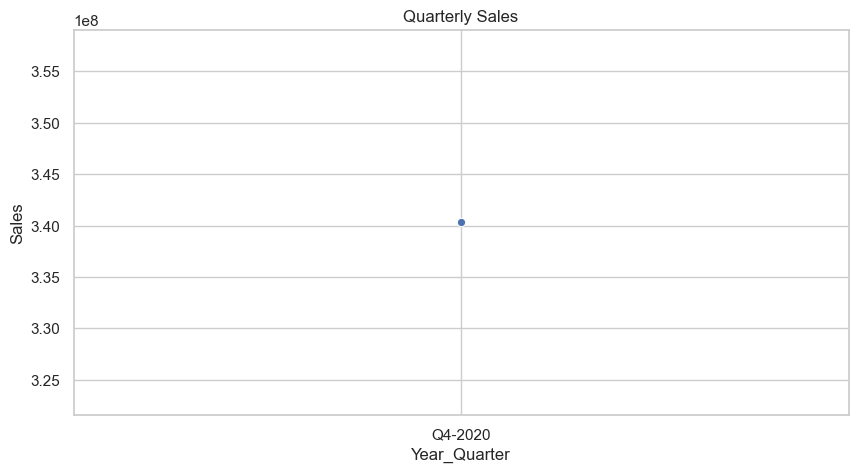

In [133]:
# Group quarterly sales
quarterly_sales = df_orig.groupby(["Year","Quarter"])["Sales"].sum().reset_index()

# Create business-friendly labels
quarterly_sales["Year_Quarter"] = "Q" + quarterly_sales["Quarter"].astype(str) + "-" + quarterly_sales["Year"].astype(str)


plt.figure(figsize=(10,5))
sns.lineplot(data=quarterly_sales, x="Year_Quarter", y="Sales", marker="o")
plt.title("Quarterly Sales")
plt.show()


<h4> My Recommendation for Visualization library</h4>
<strong> For this analysis, I recommend using Seaborn as the primary visualization package, with Matplotlib as a supporting tool for fine-tuned customization. Seaborn offers high-level, easy-to-use functions that integrate seamlessly with Pandas DataFrames, making it efficient for generating statistical plots such as bar charts, line plots, and heatmaps. Its built-in support for aggregations (e.g., sum, mean) and aesthetically pleasing default styles reduce the effort needed to prepare presentation-ready charts. Meanwhile, Matplotlib provides additional flexibility for customizing axes, labels, and layouts. This combination ensures a balance of simplicity, clarity, and flexibility, making it the most effective choice for exploratory data analysis and communication of insights. </strong>